## Install and Import Packages

In [1]:
# Use seaborn for pairplot
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

C:\ProgramData\Anaconda3\envs\py38_tf2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\py38_tf2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\py38_tf2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\py38_tf2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


## Load data CSV

In [5]:
dataset = pd.read_csv('full_data_1115-1.csv', encoding='utf-8')

In [6]:
dataset.tail()

,Unnamed: 0,name,win,pick,ban,win rank,pick rank,ban rank,title count,title count rank
151,35,타릭,51.89,0.84,0.06,36,149,152,9,152
152,58,바드,51.47,1.85,0.09,59,123,146,9,153
153,43,하이머딩거,51.73,1.24,1.37,44,138,74,9,154
154,40,벨코즈,51.81,1.75,0.14,41,130,135,8,155
155,133,헤카림,49.54,3.47,0.88,134,79,89,8,156


## Split the data into train and test

In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

## Inspect the data

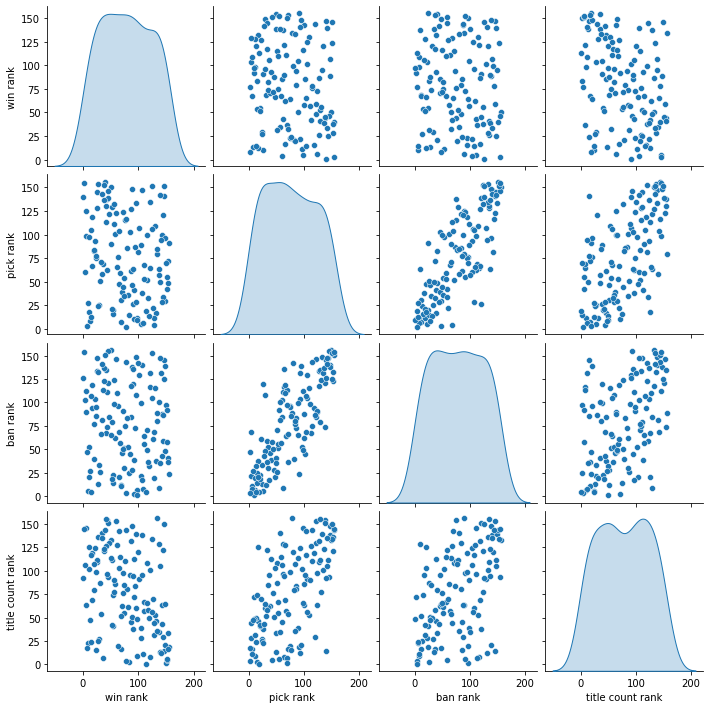

In [8]:
# Joint distribution for pairs of features
sns.pairplot(train_dataset[['win rank', 'pick rank', 'ban rank', 'title count rank']], diag_kind='kde')

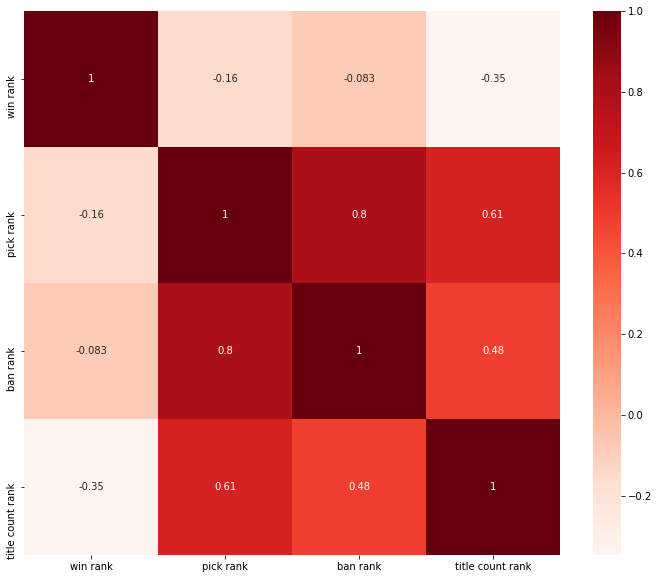

In [9]:
# Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_dataset[['win rank', 'pick rank', 'ban rank', 'title count rank']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
# Correlation with output variable
cor_target = abs(cor["title count rank"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

pick rank           0.610907
title count rank    1.000000
Name: title count rank, dtype: float64

##### -> The "pick rank" is highly correlated with the "title count rank"

## Split features from labels

In [11]:
feature_list = ['win rank', 'pick rank', 'ban rank', 'title count rank']
train_features = train_dataset[feature_list].copy()
test_features = test_dataset[feature_list].copy()

train_labels = train_features.pop('title count rank')
test_labels = test_features.pop('title count rank')

## Normalization

In [12]:
# Table of statistics
train_dataset[['win rank', 'pick rank', 'ban rank', 'title count rank']].describe().transpose()[['mean', 'std']]

,mean,std
win rank,78.520,45.491155
pick rank,76.320,46.362109
ban rank,77.768,46.037001
title count rank,77.592,46.000367


## Linear regression

In [13]:
# Plot history
def plot_loss(history, label):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel(f'Error [{label}]')
    plt.legend()
    plt.grid(True)

In [14]:
def plot_prediction(x, y, feature, label):
    plt.scatter(train_features[feature], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(f'{feature}')
    plt.ylabel(f'{label}')
    plt.legend()

#### One variable

##### Win rank feature

In [15]:
# Select feature
feature = 'win rank'

In [16]:
win_lol_model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(1,))
])
win_lol_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile model
win_lol_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [18]:
# Train model
win_history = win_lol_model.fit(
    train_features[feature], train_labels,
    epochs=800,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/800
4/4 [==============================] - 1s 37ms/step - loss: 176.7448 - val_loss: 148.0847
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 145.5670 - val_loss: 113.6208
Epoch 3/800
4/4 [==============================] - 0s 6ms/step - loss: 114.3738 - val_loss: 79.1492
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 82.9073 - val_loss: 55.3921
Epoch 5/800
4/4 [==============================] - 0s 6ms/step - loss: 62.1569 - val_loss: 59.0969
Epoch 6/800
4/4 [==============================] - 0s 6ms/step - loss: 55.6627 - val_loss: 67.9078
Epoch 7/800
4/4 [==============================] - 0s 7ms/step - loss: 56.1433 - val_loss: 74.4354
Epoch 8/800
4/4 [==============================] - 0s 6ms/step - loss: 58.3558 - val_loss: 75.3386
Epoch 9/800
4/4 [==============================] - 0s 6ms/step - loss: 57.8412 - val_loss: 72.0431
Epoch 10/800
4/4 [==============================] - 0s 6ms/step - loss: 56.4306 - val_loss: 69.0733
Epo

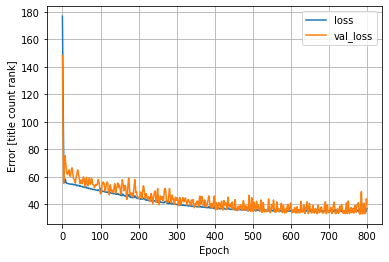

In [19]:
plot_loss(win_history, label='title count rank')

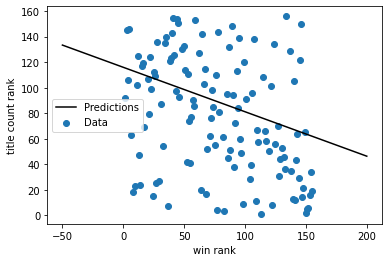

In [20]:
x = tf.linspace(-50, 200, 251)
y = win_lol_model.predict(x)
plot_prediction(x, y, feature='win rank', label='title count rank')

In [21]:
# Get equation
win_lol_model.get_weights()

[array([[-0.348]], dtype=float32), array([115.961], dtype=float32)]

##### Linear equation to compute "title count rank" from "win rank": $$TitleCountRank = -0.348 \times WinRank + 115.961$$

##### Pick rank feature

In [22]:
# Select feature
feature = 'pick rank'

In [23]:
pick_lol_model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(1,))
])
pick_lol_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile model
pick_lol_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [25]:
# Train model
pick_history = pick_lol_model.fit(
    train_features[feature], train_labels,
    epochs=800,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/800
4/4 [==============================] - 0s 29ms/step - loss: 151.2765 - val_loss: 111.1818
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 119.9477 - val_loss: 82.2666
Epoch 3/800
4/4 [==============================] - 0s 6ms/step - loss: 89.1482 - val_loss: 54.9777
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 60.4011 - val_loss: 37.8766
Epoch 5/800
4/4 [==============================] - 0s 6ms/step - loss: 39.6119 - val_loss: 34.6412
Epoch 6/800
4/4 [==============================] - 0s 6ms/step - loss: 30.2671 - val_loss: 43.0419
Epoch 7/800
4/4 [==============================] - 0s 6ms/step - loss: 36.4309 - val_loss: 48.4716
Epoch 8/800
4/4 [==============================] - 0s 6ms/step - loss: 39.0390 - val_loss: 46.5414
Epoch 9/800
4/4 [==============================] - 0s 6ms/step - loss: 36.6525 - val_loss: 41.6058
Epoch 10/800
4/4 [==============================] - 0s 6ms/step - loss: 32.0968 - val_loss: 35.6661
Epoch

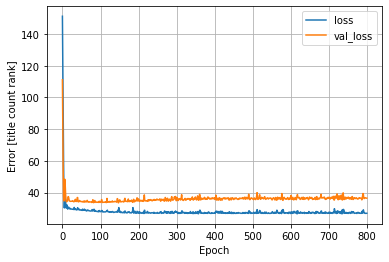

In [26]:
plot_loss(pick_history, label='title count rank')

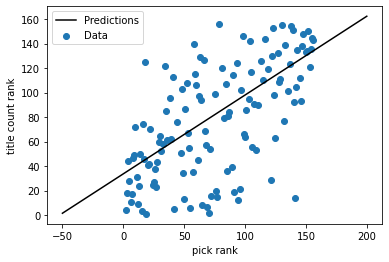

In [27]:
x = tf.linspace(-50, 200, 251)
y = pick_lol_model.predict(x)
plot_prediction(x, y, feature='pick rank', label='title count rank')

In [28]:
# Get equation
pick_lol_model.get_weights()

[array([[0.643]], dtype=float32), array([33.712], dtype=float32)]

##### Linear equation to compute "title count rank" from "pick rank": $$TitleCountRank = 0.643 \times PickRank + 33.712$$

##### Ban rank feature

In [29]:
# Select feature
feature = 'ban rank'

In [30]:
ban_lol_model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(1,))
])
pick_lol_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile model
ban_lol_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [32]:
# Train model
ban_history = ban_lol_model.fit(
    train_features[feature], train_labels,
    epochs=800,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/800
4/4 [==============================] - 0s 29ms/step - loss: 55.8976 - val_loss: 36.7874
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 37.9535 - val_loss: 36.8258
Epoch 3/800
4/4 [==============================] - 0s 6ms/step - loss: 36.7459 - val_loss: 44.5848
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 40.3551 - val_loss: 43.7891
Epoch 5/800
4/4 [==============================] - 0s 6ms/step - loss: 38.4178 - val_loss: 37.8374
Epoch 6/800
4/4 [==============================] - 0s 6ms/step - loss: 34.7262 - val_loss: 35.3469
Epoch 7/800
4/4 [==============================] - 0s 6ms/step - loss: 34.8759 - val_loss: 35.3406
Epoch 8/800
4/4 [==============================] - 0s 6ms/step - loss: 35.5777 - val_loss: 35.3314
Epoch 9/800
4/4 [==============================] - 0s 6ms/step - loss: 34.5328 - val_loss: 35.4520
Epoch 10/800
4/4 [==============================] - 0s 6ms/step - loss: 34.9122 - val_loss: 37.6375
Epoch 11

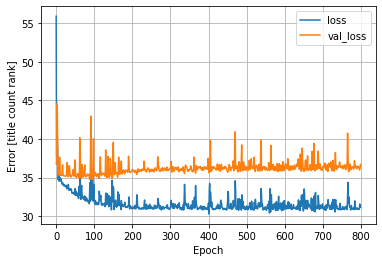

In [33]:
plot_loss(ban_history, label='title count rank')

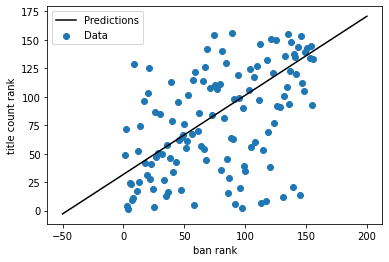

In [34]:
x = tf.linspace(-50, 200, 251)
y = ban_lol_model.predict(x)
plot_prediction(x, y, feature='ban rank', label='title count rank')

In [35]:
# Get equation
ban_lol_model.get_weights()

[array([[0.695]], dtype=float32), array([31.787], dtype=float32)]

##### Linear equation to compute "title count rank" from "ban rank": $$TitleCountRank = 0.695 \times BanRank + 31.787$$

#### Multivariate

In [36]:
mul_lol_model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(3,))
])
mul_lol_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile model
mul_lol_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [38]:
history = mul_lol_model.fit(
    train_features, train_labels, 
    epochs=800,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/800
4/4 [==============================] - 0s 28ms/step - loss: 211.0416 - val_loss: 133.5491
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 118.7384 - val_loss: 46.8852
Epoch 3/800
4/4 [==============================] - 0s 6ms/step - loss: 44.0159 - val_loss: 59.1184
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 46.0715 - val_loss: 80.7685
Epoch 5/800
4/4 [==============================] - 0s 6ms/step - loss: 58.4186 - val_loss: 68.3770
Epoch 6/800
4/4 [==============================] - 0s 6ms/step - loss: 41.9324 - val_loss: 45.1303
Epoch 7/800
4/4 [==============================] - 0s 6ms/step - loss: 30.1930 - val_loss: 37.5785
Epoch 8/800
4/4 [==============================] - 0s 6ms/step - loss: 36.3849 - val_loss: 36.7883
Epoch 9/800
4/4 [==============================] - 0s 6ms/step - loss: 32.2163 - val_loss: 39.9827
Epoch 10/800
4/4 [==============================] - 0s 6ms/step - loss: 29.4018 - val_loss: 48.6623
Epoch

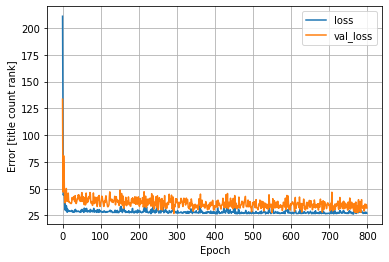

In [39]:
plot_loss(history, label='title count rank')

In [66]:
win_pred = np.linspace(-50, 200, 251)
pick_pred = np.linspace(-50, 200, 251)
ban_pred = np.linspace(-50, 200, 251)

In [67]:
xx_pred, yy_pred = np.meshgrid(win_pred, pick_pred)
_, zz_pred = np.meshgrid(win_pred, ban_pred)

In [75]:
X = np.array([xx_pred.flatten(), yy_pred.flatten(), zz_pred.flatten()]).T
Y = mul_lol_model.predict(X)

In [78]:
x = train_features['win rank'].values
y = train_features['pick rank'].values
z = train_features['ban rank'].values
l = train_labels.values

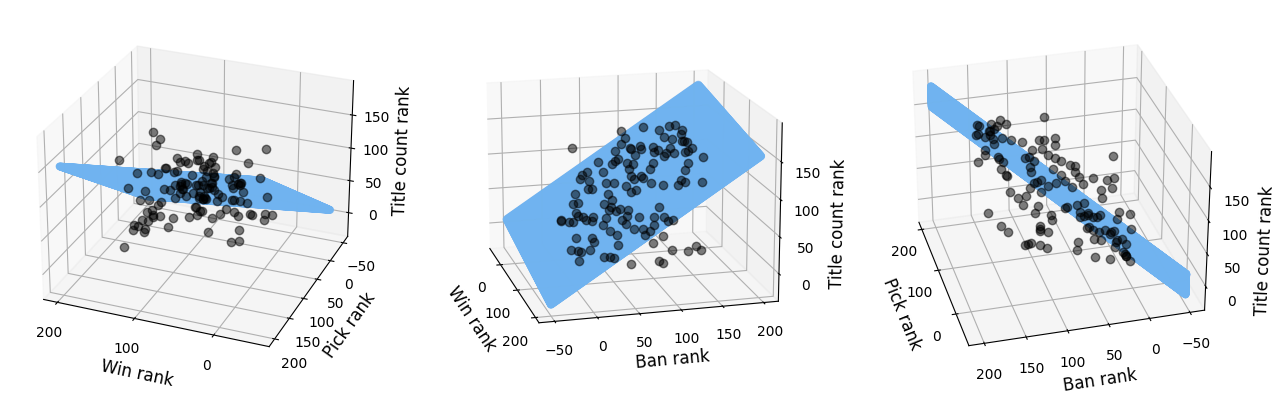

In [87]:
plt.style.use('default')

fig = plt.figure(figsize=(13, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

ax1.plot(x, y, l, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), Y, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax1.set_xlabel('Win rank', fontsize=12)
ax1.set_ylabel('Pick rank', fontsize=12)
ax1.set_zlabel('Title count rank', fontsize=12)
ax1.locator_params(nbins=4, axis='x')
ax1.locator_params(nbins=5, axis='x')

ax2.plot(x, z, l, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax2.scatter(xx_pred.flatten(), zz_pred.flatten(), Y, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax2.set_xlabel('Win rank', fontsize=12)
ax2.set_ylabel('Ban rank', fontsize=12)
ax2.set_zlabel('Title count rank', fontsize=12)
ax2.locator_params(nbins=4, axis='x')
ax2.locator_params(nbins=5, axis='x')

ax3.plot(y, z, l, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax3.scatter(yy_pred.flatten(), zz_pred.flatten(), Y, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax3.set_xlabel('Pick rank', fontsize=12)
ax3.set_ylabel('Ban rank', fontsize=12)
ax3.set_zlabel('Title count rank', fontsize=12)
ax3.locator_params(nbins=4, axis='x')
ax3.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-15)
ax3.view_init(elev=30, azim=165)

fig.tight_layout()

In [40]:
x = tf.linspace([-50,-50,-50], [200,200,200], 251, axis=0)
y = mul_lol_model.predict(x)

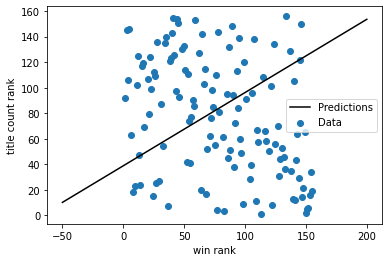

In [41]:
plot_prediction(x[:,0], y, feature='win rank', label='title count rank')

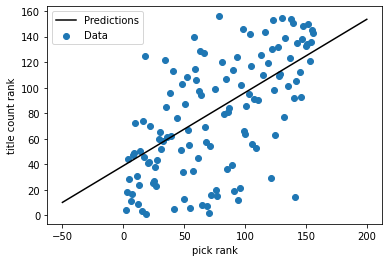

In [42]:
plot_prediction(x[:,1], y, feature='pick rank', label='title count rank')

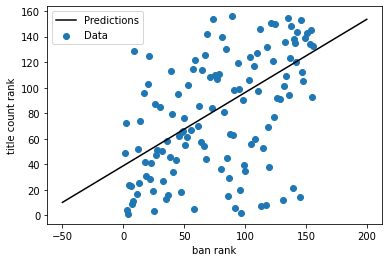

In [43]:
plot_prediction(x[:,2], y, feature='ban rank', label='title count rank')

In [44]:
# Get equation
mul_lol_model.get_weights()

[array([[-0.129],
        [ 0.585],
        [ 0.118]], dtype=float32),
 array([38.746], dtype=float32)]

##### Muntivariate linear equation to compute "title count rank": $$TitleCountRank = -0.129 \times WinRank + 0.585 \times PickRank + 0.118 \times BanRank + 38.746$$

## Performance on test set

In [45]:
test_results = {}

In [46]:
test_results['win_model'] = win_lol_model.evaluate(
    test_features['win rank'],
    test_labels, verbose=0)
test_results['pick_model'] = pick_lol_model.evaluate(
    test_features['pick rank'],
    test_labels, verbose=0)
test_results['ban_model'] = ban_lol_model.evaluate(
    test_features['ban rank'],
    test_labels, verbose=0)
test_results['multi_model'] = mul_lol_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [47]:
pd.DataFrame(test_results, index=['Mean absolute error [title count rank]']).T

,Mean absolute error [title count rank]
win_model,34.693256
pick_model,25.866261
ban_model,25.155836
multi_model,24.071115


#### Make predictions

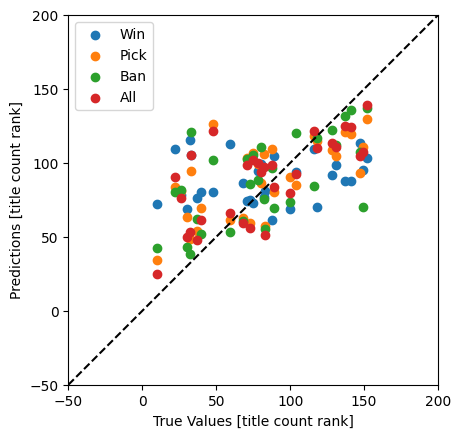

In [94]:
test_win_predictions = win_lol_model.predict(test_features['win rank']).flatten()
test_pick_predictions = pick_lol_model.predict(test_features['pick rank']).flatten()
test_ban_predictions = ban_lol_model.predict(test_features['ban rank']).flatten()
test_predictions = mul_lol_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_win_predictions)
plt.scatter(test_labels, test_pick_predictions)
plt.scatter(test_labels, test_ban_predictions)
plt.scatter(test_labels, test_predictions)
plt.legend(['Win','Pick','Ban','All'])
plt.xlabel('True Values [title count rank]')
plt.ylabel('Predictions [title count rank]')
lims = [-50, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, '--', color='k')

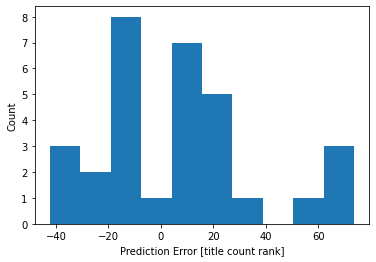

In [54]:
# Error distribution
error = test_predictions - test_labels
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [title count rank]')
_ = plt.ylabel('Count')

Text(0, 0.5, 'Prediction Error [title count rank]')

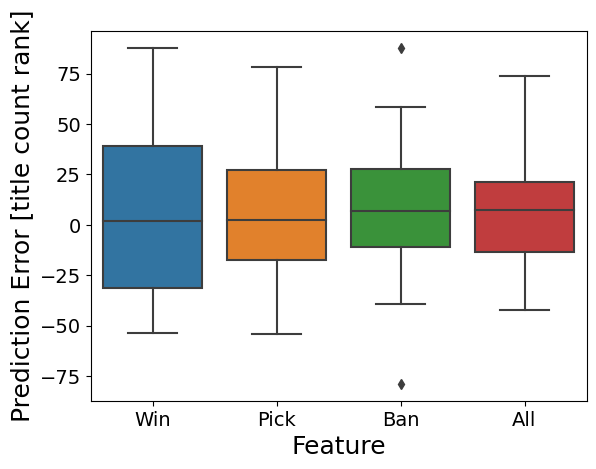

In [106]:
sns.boxplot(data=[test_win_predictions-test_labels, test_pick_predictions-test_labels, test_ban_predictions-test_labels, error])
# Swarm plot adds no value here, ignore below
# sns.swarmplot(y=df['gamelength'], color=colors[2])
plt.yticks(fontsize=14)
plt.xticks(plt.xticks()[0], ['Win', 'Pick', 'Ban', 'All'],fontsize=14)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Prediction Error [title count rank]', fontsize = 18)